## TASK -4

## SMS SPAM DETECTION

**Description :** Build an AI model that can classify SMS messages as spam or legitimate. Use techniques like TF-IDF or word embeddings with classifiers like Naive Bayes, Logistic Regression, or Support Vector Machines to identify spam messages

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

**Data loading**

In [2]:
# Import Required Libraries
import numpy as np
import pandas as pd
import seaborn as sbn
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\kuruk\Downloads\CODE SOFT PROJECTS\PROJECT -4\SMS SPAM DETECTION DATASET\spam.csv",encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

**DATA CLEANING**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
df.duplicated().sum()

403

In [9]:
# Dropping the unnecessary columns 
dropping_columns = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
df = df.drop(df[dropping_columns], axis=1)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
df.rename(columns = {"v1":"Ham/Spam", "v2":"Text"}, inplace = True)
df.head()

,Ham/Spam,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isnull().sum()

Ham/Spam    0
Text        0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates()
df

,Ham/Spam,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
df.shape

(5169, 2)

In [15]:
df.duplicated().sum()

0

In [16]:
df.describe().T

,count,unique,top,freq
Ham/Spam,5169,2,ham,4516
Text,5169,5169,"Go until jurong point, crazy.. Available only ...",1


**DATA VISUALIZATION**

In [17]:
counts = df['Ham/Spam'].value_counts()
counts

Ham/Spam
ham     4516
spam     653
Name: count, dtype: int64

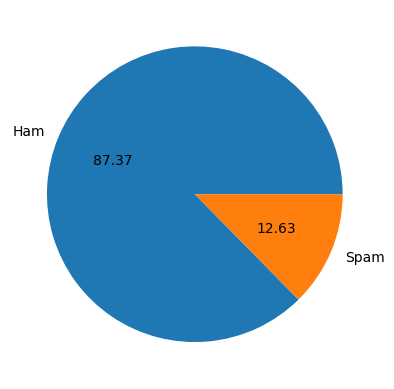

In [18]:
#Pie Plot
plt.pie(counts, labels=['Ham','Spam'], autopct='%0.2f')
plt.show()

In [19]:
df['Text_length'] = df['Text'].apply(len)
df.head()

,Ham/Spam,Text,Text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


**LABEL ENCODING**

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Target'] = le.fit_transform(df['Ham/Spam'])

In [21]:
df.head()

,Ham/Spam,Text,Text_length,Target
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


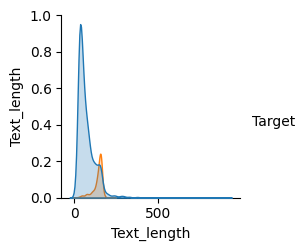

In [22]:
sbn.pairplot(df,hue='Target')

**TEXT PREPROCESSING**

In [23]:
# Cleaning the description to simplify the text 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

stopwords_set = set(stopwords.words('english'))

def processed_text(Text):
    tokens = word_tokenize(re.sub(r'[^\w\s#@\$]', '', Text.lower()))
    lemmatizer = WordNetLemmatizer()
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords_set]
    return " ".join(filtered_tokens)


In [24]:
# Let us see one example
print(f'before processing the text : ',df['Text'][1])
transformed_text = processed_text(df['Text'][1])
print(f'After the text processinsg :' ,transformed_text)

before processing the text :  Ok lar... Joking wif u oni...
After the text processinsg : ok lar joking wif u oni


In [25]:
df['pro_text'] = df['Text'].apply(processed_text)
df.head()

,Ham/Spam,Text,Text_length,Target,pro_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,0,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,nah dont think go usf life around though


## Train, Test and Splitting the data

In [26]:
from sklearn.model_selection import train_test_split

# Split data into train and test datasets
train_data, test_data, train_label, test_label = train_test_split(df['pro_text'], df['Target'], test_size=0.2, random_state=42)

# Display the sizes of the train and test datasets
print(f'Split data into train and test data-sets')
print(f'Train dataSet Size: {len(train_data)}\nTest dataSet Size: {len(test_data)}')

Split data into train and test data-sets
Train dataSet Size: 4135
Test dataSet Size: 1034


## TF-IDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=100000)
train_data_tfidf = vectorizer.fit_transform(train_data)
test_data_tfidf = vectorizer.transform(test_data)

## MODEL IMPLEMENTATION

**LOGISTIC REGRESSOR**

In [28]:
# Importing the Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [29]:
# fitting the trained data to the model

classifier = LogisticRegression()
classifier.fit(train_data_tfidf, train_label)

LogisticRegression()

In [30]:
#making predictions

predictions = classifier.predict(test_data_tfidf)

# Print a report

print(classification_report(test_label, predictions))

# Calculate accuracy score for evaluation

accuracy_1 = accuracy_score(test_label, predictions)
print(f"Logistic Regression Accuracy: {accuracy_1:.2%}")

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       0.99      0.69      0.81       145

    accuracy                           0.96      1034
   macro avg       0.97      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034

Logistic Regression Accuracy: 95.55%


**NAIVE BAYES MODEL**

In [31]:
#importing the libraries

from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import accuracy_score, classification_report

In [32]:
# fitting the trained data to the model

naive_bayes_model = MultinomialNB(alpha=0.3)
naive_bayes_model.fit(train_data_tfidf, train_label)


MultinomialNB(alpha=0.3)

In [33]:
# Making Predictions

predictions = naive_bayes_model.predict(test_data_tfidf)

# Printing a  report

print(classification_report(test_label, predictions))

# Calculate accuracy score for evaluation

accuracy_2 = accuracy_score(test_label, predictions)
print(f"Naive Bayes Accuracy: {accuracy_2:.2%}")


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.99      0.81      0.89       145

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034

Naive Bayes Accuracy: 97.29%


**RANDOM FOREST CLASSIFIER**

In [34]:
# Importing the libraires

from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, classification_report


In [35]:
# fitting the trained data to the model

rf_model = RandomForestClassifier() 
rf_model.fit(train_data_tfidf, train_label)


RandomForestClassifier()

In [36]:
# Making predictions

predictions = rf_model.predict(test_data_tfidf)

# Printing a report

print(classification_report(test_label, predictions))

# Calculating accuracy score for evaluation

accuracy_3 = accuracy_score(test_label, predictions)
print(f"Random Forest Accuracy: {accuracy_3:.2%}")


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.99      0.77      0.87       145

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.92      1034
weighted avg       0.97      0.97      0.97      1034

Random Forest Accuracy: 96.71%


**SUPPORT VECTOR CLASSIFIER**

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [38]:
# fitting the trained data to the model
svm_model = SVC()
svm_model.fit(train_data_tfidf, train_label)

SVC()

In [39]:
# Making predictions

predictions = svm_model.predict(test_data_tfidf)

# Printing a report

print(classification_report(test_label, predictions))

# Calculating accuracy score for evaluation

accuracy_4 = accuracy_score(test_label, predictions)
print(f"Support vector classifier Accuracy: {accuracy_4:.2%}")


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       889
           1       0.99      0.83      0.90       145

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.98      0.97      0.97      1034

Support vector classifier Accuracy: 97.49%


## Model Comparision

In [40]:
# Create an empty DataFrame

scores_df = pd.DataFrame()

Model=['Logistic Regression','Naibe Bayes Classifier', 'Random Forest Classifier','Support Vector Classifier']

# Add scores to the DataFrame

scores_df['Model'] = ['Logistic Regression','Naibe Bayes Classifier', 'Random Forest Classifier','Support Vector Classifier']
scores_df['accuracy_score'] = [accuracy_1,accuracy_2,accuracy_3,accuracy_4]


In [41]:
#Display the dataframe
scores_df

,Model,accuracy_score
0,Logistic Regression,0.955513
1,Naibe Bayes Classifier,0.972921
2,Random Forest Classifier,0.967118
3,Support Vector Classifier,0.974855


**Conclusion :** Support Vector Classifier Model is better suited to make predictions to detect SMS Spam detections.